In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.linear_model import TheilSenRegressor, RANSACRegressor, HuberRegressor

df = pd.read_csv('modelingdf.csv')
df = df.drop('Unnamed: 0', axis =1)

In [2]:
df.head()

,A,FC,G,GP,GS,MINS,OFF,R,SHTS,SOG,Y,season,club,position,next_year_compensation,name,current_compensation
0,0.0,7.0,0.0,8.0,5.0,460.0,3.0,0.0,8.0,3.0,0.0,2007,CLB,M,12900,brian plotkin,30000
1,4.0,28.0,3.0,30.0,11.0,1241.0,4.0,0.0,38.0,16.0,5.0,2007,CHI,F,63100,calen carr,50500
2,2.0,21.0,8.0,33.0,28.0,2181.0,37.0,0.0,65.0,41.0,3.0,2007,TFC,F,61273,chad barrett,48713
3,3.0,15.0,8.0,22.0,21.0,1721.0,5.0,0.0,44.0,22.0,1.0,2007,CHI,F,86075,chris rolfe,74700
4,0.0,43.0,1.0,26.0,24.0,2044.0,2.0,0.0,11.0,3.0,4.0,2007,CHI,D,44625,dasan robinson,42500


In [3]:
df = df.drop('name', axis=1)

In [4]:
df = pd.get_dummies(df)

In [5]:
df.shape

(2360, 53)

In [6]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state = 12)
X_train = df_train.loc[:, ~(df_train.columns).isin(['next_year_compensation'])]
Y_train = df_train['next_year_compensation']
X_test = df_test.loc[:, ~(df_test.columns).isin(['next_year_compensation'])]
Y_test = df_test['next_year_compensation']

In [7]:
linear = LinearRegression()
ridge = Ridge()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
theilsan = TheilSenRegressor()
ransac = RANSACRegressor()
huber = HuberRegressor()
svr = SVR()

In [8]:
df.next_year_compensation.describe()

count    2.360000e+03
mean     2.639321e+05
std      6.329589e+05
min      1.290000e+04
25%      7.857075e+04
50%      1.330625e+05
75%      2.178958e+05
max      7.115556e+06
Name: next_year_compensation, dtype: float64

In [9]:
def get_metrics(model, dataframe):
    x = dataframe.loc[:, ~(df_train.columns).isin(['next_year_compensation'])]
    y = dataframe['next_year_compensation']
    r2_scores = cross_val_score(model, x, y, cv=10)
    r2 = r2_scores.mean()
    mse_scores = cross_val_score(model,x,y, cv=10, scoring='neg_mean_squared_error')
    mse = mse_scores.mean() * -1
    rmse = np.sqrt(mse)
    print(model)
    print('R2 Score:', r2)
    print('MSE:', mse)
    print('RMSE:', rmse)

In [10]:
get_metrics(linear, df_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
R2 Score: 0.937715865588
MSE: 22778870790.8
RMSE: 150926.706685


In [11]:
get_metrics(ridge,df_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
R2 Score: 0.937773128924
MSE: 22761277850.3
RMSE: 150868.412368


In [12]:
get_metrics(gbr, df_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
R2 Score: 0.920950775352
MSE: 30293261139.4
RMSE: 174049.593908


In [13]:
get_metrics(rfr, df_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
R2 Score: 0.903501156231
MSE: 28483950113.6
RMSE: 168771.887806


In [14]:
get_metrics(theilsan, df_train)

TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
         max_subpopulation=10000, n_jobs=1, n_subsamples=None,
         random_state=None, tol=0.001, verbose=False)
R2 Score: 0.918140394145
MSE: 30518972359.8
RMSE: 174696.801229


In [15]:
get_metrics(ransac, df_train)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_metric=None,
        residual_threshold=None, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)
R2 Score: 0.937498215048
MSE: 24527745135.6
RMSE: 156613.361932


In [16]:
get_metrics(huber, df_train)

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
        tol=1e-05, warm_start=False)
R2 Score: 0.937975901406
MSE: 23502839724.0
RMSE: 153306.359046


In [17]:
get_metrics(svr, df_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R2 Score: -0.0429988568355
MSE: 395386159749.0
RMSE: 628797.391653


In [18]:
# Best Scores - Huber, Linear, Ransac, and Ridge
# Dropping svr due to scores

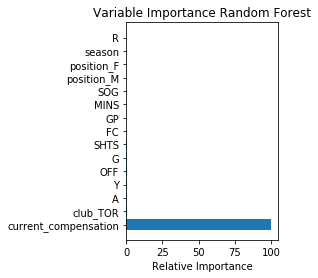

In [19]:
rfr.fit(X_train, Y_train)

feature_importance = rfr.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[::-1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos[0:15], feature_importance[sorted_idx[0:15]], align='center')
plt.yticks(pos[0:15], X_train.columns[sorted_idx[0:15]])
plt.xlabel('Relative Importance')
plt.title('Variable Importance Random Forest')
plt.show()

In [21]:
huber.fit(X_train,Y_train)
print(huber.coef_)
print(huber.intercept_)
print(X_train.columns)

[  1.83350308e+01   4.57191366e+01   3.00488095e+01  -1.22559541e+01
   6.36366291e-01   5.22799343e+00   3.57859925e+01   5.69857460e-01
   1.75118907e+02   7.61608081e+01  -1.02837208e+00   1.26755106e+00
   9.95132138e-01  -9.20124606e-02   7.72988794e-03  -3.85326045e-02
  -5.85679859e-01  -3.93978839e-01   1.69226042e-01  -1.48418243e-02
   1.52478058e-02   6.26304279e-01  -4.00762210e-01  -1.00849568e-01
   8.10974412e-02   2.80400915e-01  -1.10287509e-01  -7.00958816e-01
   2.71772589e-01   5.58970985e-02   1.26798268e-01   1.18136648e-01
   4.37417663e-02  -3.30335191e-02   5.96213433e-01  -5.39584458e-01
  -1.95628175e-01   1.24222757e-01   1.57022139e-01   5.21286093e-01
  -2.51854139e+00  -1.24499292e-01   7.92944075e-02   6.58920023e-03
   1.30654905e+00   3.54097852e-01   8.19835556e-02   7.83354124e-01
  -1.16405391e-01   1.16994305e-01  -2.58821923e-02   4.54059844e-02]
0.0995637699573
Index(['A', 'FC', 'G', 'GP', 'GS', 'MINS', 'OFF', 'R', 'SHTS', 'SOG', 'Y',
       'sea